In [4]:
import cv2
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers

In [5]:
batch_size = 100
img_height = 250
img_width = 250

In [6]:
training_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/accident-detection-from-cctv-footage/data/train',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size

)

testing_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/accident-detection-from-cctv-footage/data/test',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

validation_ds =  tf.keras.preprocessing.image_dataset_from_directory(
    '/kaggle/input/accident-detection-from-cctv-footage/data/val',
    seed=101,
    image_size= (img_height, img_width),
    batch_size=batch_size)

Found 791 files belonging to 2 classes.
Found 100 files belonging to 2 classes.
Found 98 files belonging to 2 classes.


In [7]:
class_names = training_ds.class_names

AUTOTUNE = tf.data.experimental.AUTOTUNE
training_ds = training_ds.cache().prefetch(buffer_size=AUTOTUNE)
testing_ds = testing_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [8]:
img_shape = (img_height, img_width, 3)

base_model = tf.keras.applications.MobileNetV2(input_shape=img_shape,
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

9406464/9406464 [==============================] - 0s 0us/step


In [9]:
model = tf.keras.Sequential([
    base_model,
    layers.Conv2D(32, 3, activation='relu'),
    layers.Conv2D(64, 3, activation='relu'),
    layers.Conv2D(128, 3, activation='relu'),
    layers.Flatten(),
    layers.Dense(len(class_names), activation= 'softmax')
])

In [10]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
history = model.fit(training_ds, validation_data = validation_ds, epochs = 50)

Epoch 1/50
8/8 [==============================] - 15s 377ms/step - loss: 0.7799 - accuracy: 0.5752 - val_loss: 0.5716 - val_accuracy: 0.6939
Epoch 2/50
8/8 [==============================] - 1s 158ms/step - loss: 0.5131 - accuracy: 0.7484 - val_loss: 0.4483 - val_accuracy: 0.8265
Epoch 3/50
8/8 [==============================] - 1s 155ms/step - loss: 0.3395 - accuracy: 0.8647 - val_loss: 0.3729 - val_accuracy: 0.8367
Epoch 4/50
8/8 [==============================] - 1s 155ms/step - loss: 0.2006 - accuracy: 0.9279 - val_loss: 0.2932 - val_accuracy: 0.8571
Epoch 5/50
8/8 [==============================] - 1s 152ms/step - loss: 0.1167 - accuracy: 0.9621 - val_loss: 0.2071 - val_accuracy: 0.8878
Epoch 6/50
8/8 [==============================] - 1s 156ms/step - loss: 0.0604 - accuracy: 0.9810 - val_loss: 0.2798 - val_accuracy: 0.8673
Epoch 7/50
8/8 [==============================] - 1s 153ms/step - loss: 0.0410 - accuracy: 0.9861 - val_loss: 0.3237 - val_accuracy: 0.8673
Epoch 8/50
8/8 [===

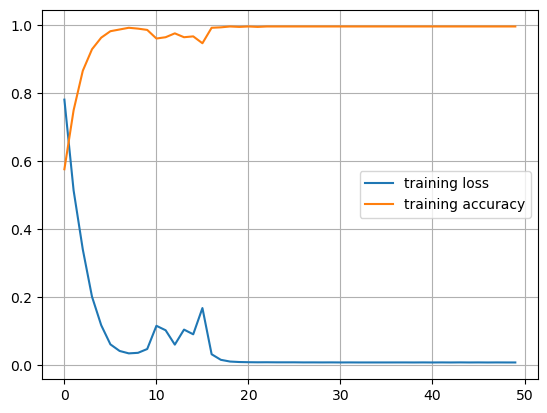

In [12]:
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['accuracy'], label = 'training accuracy')
plt.grid(True)
plt.legend()

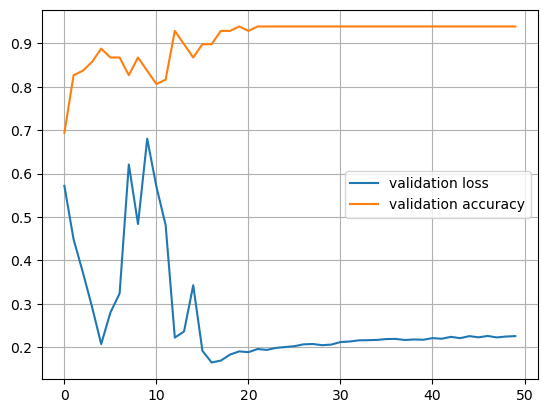

In [13]:
plt.plot(history.history['val_loss'], label = 'validation loss')
plt.plot(history.history['val_accuracy'], label = 'validation accuracy')
plt.grid(True)
plt.legend()

4/4 [==============================] - 1s 59ms/step


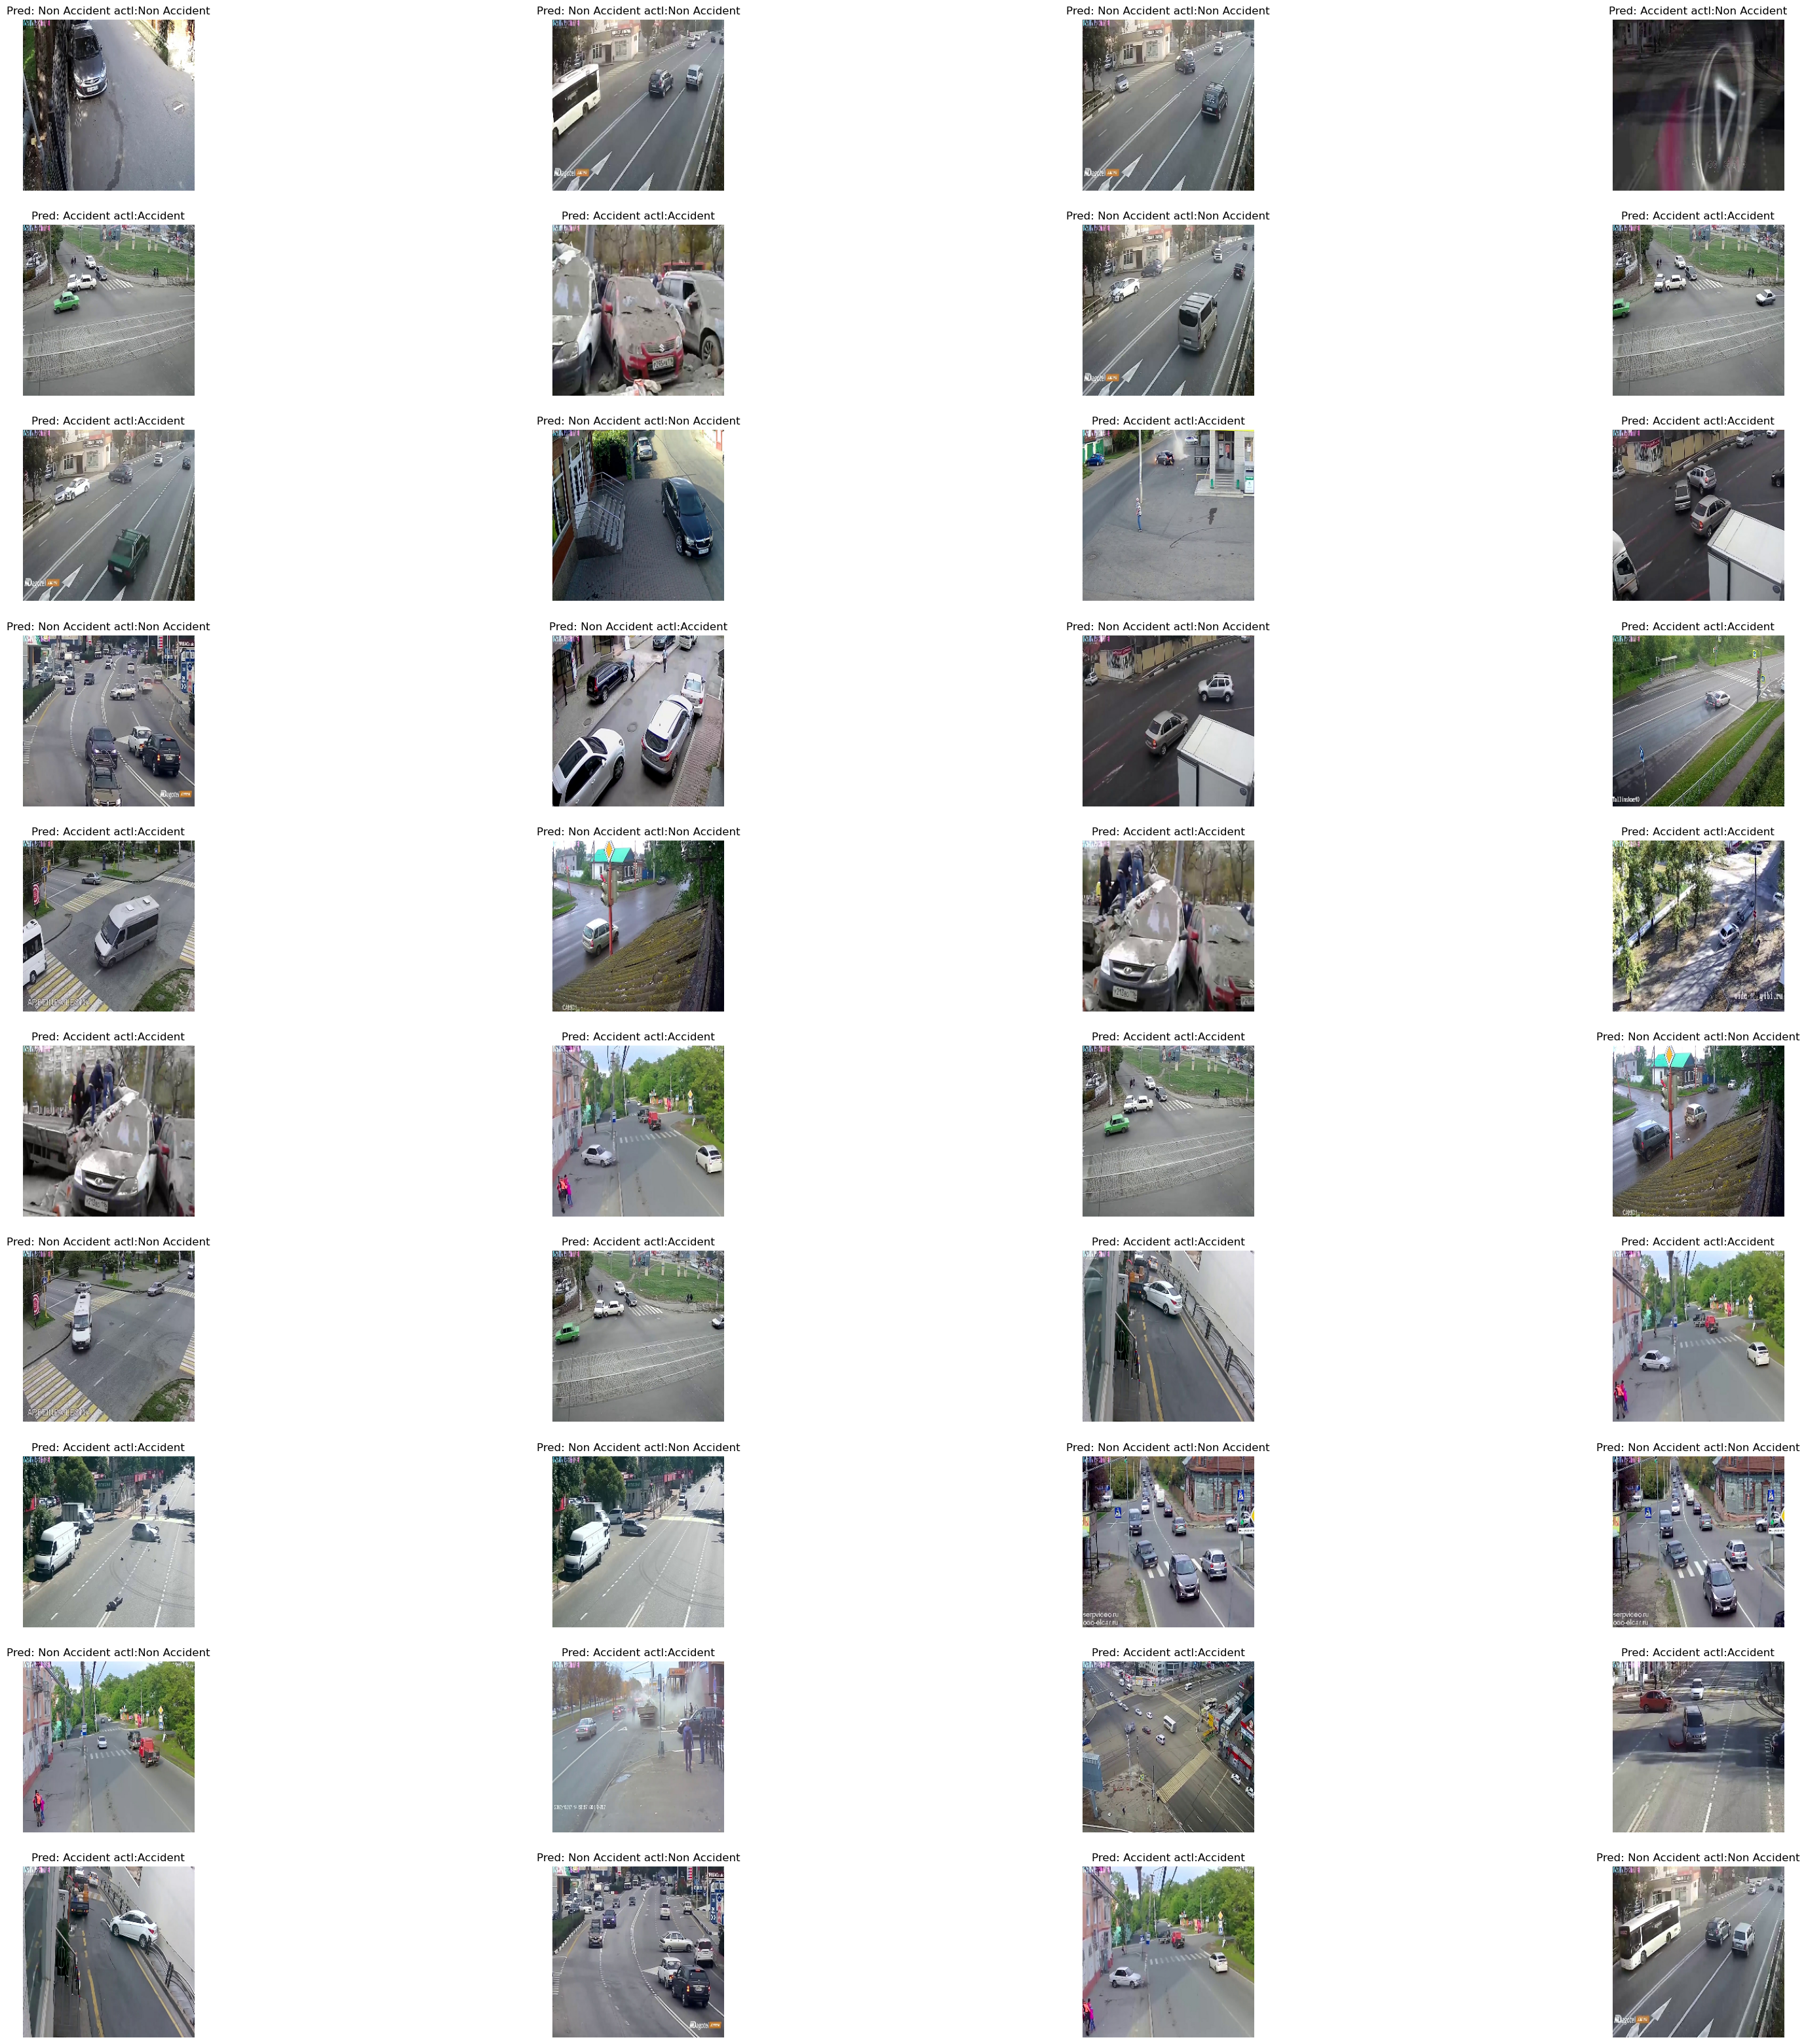

In [14]:
AccuracyVector = []
plt.figure(figsize=(40, 40))
for images, labels in testing_ds.take(1):
    predictions = model.predict(images)
    predlabel = []
    prdlbl = []
    
    for mem in predictions:
        predlabel.append(class_names[np.argmax(mem)])
        prdlbl.append(np.argmax(mem))
    
    AccuracyVector = np.array(prdlbl) == labels
    for i in range(40):
        ax = plt.subplot(10, 4, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title('Pred: '+ predlabel[i]+' actl:'+class_names[labels[i]] )
        plt.axis('off')
        plt.grid(True)

In [15]:
truePositive=0
trueNegative=0
falsePositive=0
falseNegative=0
for i in range(0,100):
    if(predlabel[i]==class_names[labels[i]] and predlabel[i]=='Accident'):
        truePositive+=1
    elif(predlabel[i]==class_names[labels[i]] and predlabel[i]=='Non Accident'):
        trueNegative+=1
    elif(predlabel[i]=='Non Accident' and class_names[labels[i]]=='Accident'):
        falseNegative+=1
    else:
        falsePositive+=1

In [16]:
print(f'True positives are: {truePositive}')
print(f'True negatives are: {trueNegative}')
print(f'False negatives are: {falseNegative}')
print(f'False positives are: {falsePositive}')

True positives are: 44
True negatives are: 50
False negatives are: 3
False positives are: 3


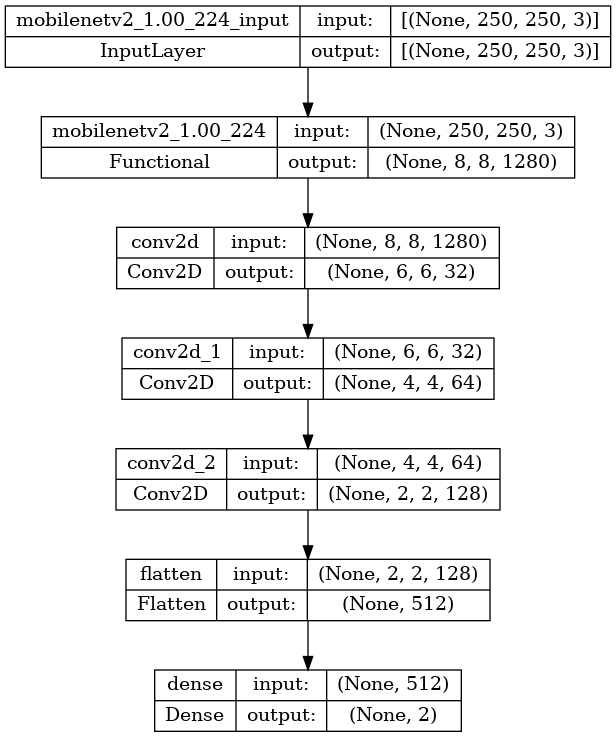

In [17]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [18]:
print(class_names)

['Accident', 'Non Accident']


In [19]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_true = np.concatenate([y for x, y in testing_ds], axis=0)
y_pred = np.argmax(model.predict(testing_ds), axis=1)

accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='macro')
recall = recall_score(y_true, y_pred, average='macro')
f1 = f1_score(y_true, y_pred, average='macro')

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)


1/1 [==============================] - 1s 835ms/step
Accuracy: 0.94
Precision: 0.9397832195905259
Recall: 0.9397832195905259
F1 Score: 0.9397832195905259


1/1 [==============================] - 1s 903ms/step


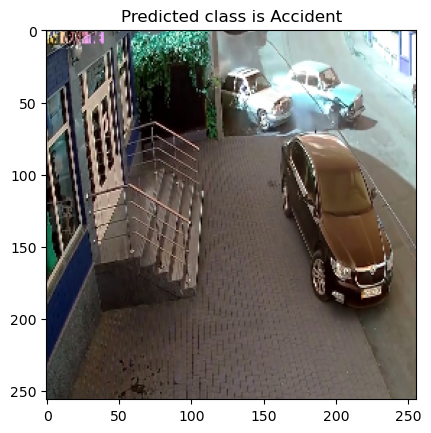

In [20]:
import cv2
import numpy as np
import os
random_data_dirname = os.path.join("/kaggle/input/accident-detection-from-cctv-footage/data/test/Accident")
pics = [os.path.join(random_data_dirname, filename) for filename in os.listdir(random_data_dirname)]

sample = cv2.imread(pics[1], cv2.IMREAD_COLOR)
sample = cv2.resize(sample, (256, 256))

prediction = model.predict(np.expand_dims(sample/255, 0))
if np.any(prediction >= 0.5):
    label = 'Predicted class is Accident'
else:
    label = 'Predicted class is Not Accident'

plt.title(label)
plt.imshow(sample)
plt.show()

1/1 [==============================] - 0s 23ms/step


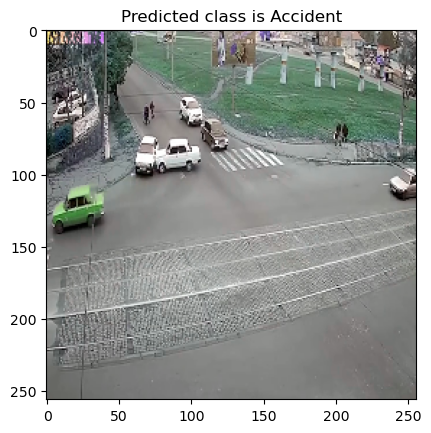

In [21]:
sample = cv2.imread(pics[2], cv2.IMREAD_COLOR)
sample = cv2.resize(sample, (256, 256))

prediction = model.predict(np.expand_dims(sample/255, 0))
if np.any(prediction >= 0.5):
    label = 'Predicted class is Accident'
else:
    label = 'Predicted class is Not Accident'

plt.title(label)
plt.imshow(sample)
plt.show()

1/1 [==============================] - 0s 23ms/step


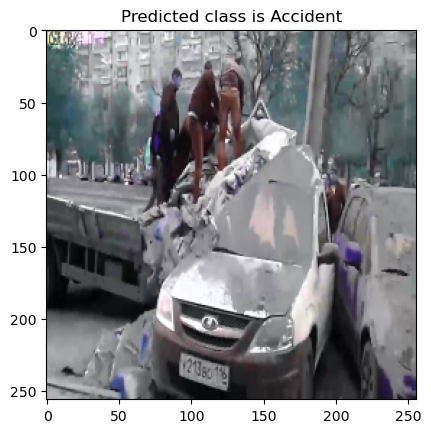

In [22]:
sample = cv2.imread(pics[4], cv2.IMREAD_COLOR)
sample = cv2.resize(sample, (256, 256))

prediction = model.predict(np.expand_dims(sample/255, 0))

if np.any(prediction >= 0.5):
    label = 'Predicted class is Accident'
else:
    label = 'Predicted class is Not Accident'

plt.title(label)
plt.imshow(sample)
plt.show()

1/1 [==============================] - 0s 22ms/step


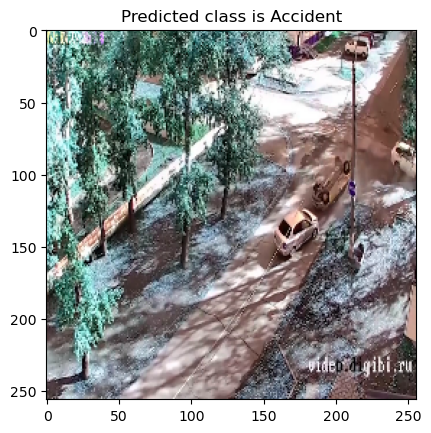

In [23]:
sample = cv2.imread(pics[10], cv2.IMREAD_COLOR)
sample = cv2.resize(sample, (256, 256))
prediction = model.predict(np.expand_dims(sample/255, 0))

if np.any(prediction >= 0.5):
    label = 'Predicted class is Accident'
else:
    label = 'Predicted class is Not Accident'

plt.title(label)
plt.imshow(sample)
plt.show()

1/1 [==============================] - 0s 23ms/step


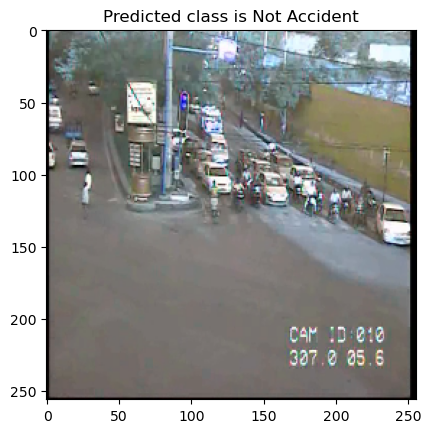

In [52]:
import cv2
import matplotlib.pyplot as plt

random_data_dirname = os.path.join("/kaggle/input/accident-detection-from-cctv-footage/data/test/Non Accident")
pics = [os.path.join(random_data_dirname, filename) for filename in os.listdir(random_data_dirname)]

sample = cv2.imread(pics[11], cv2.IMREAD_COLOR)
sample = cv2.resize(sample, (256, 256))
prediction = model.predict(np.expand_dims(sample/255, 0))
accident_probability = prediction[0][1]

threshold = 0.5

if accident_probability >= threshold:
    label = 'Predicted class is Accident'
else:
    label = 'Predicted class is Not Accident'

plt.title(label)
plt.imshow(sample)
plt.show()


1/1 [==============================] - 0s 22ms/step


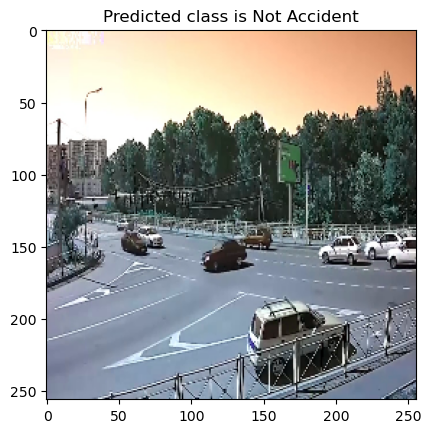

In [48]:
import cv2
import matplotlib.pyplot as plt

random_data_dirname = os.path.join("/kaggle/input/accident-detection-from-cctv-footage/data/test/Non Accident")
pics = [os.path.join(random_data_dirname, filename) for filename in os.listdir(random_data_dirname)]
sample = cv2.imread(pics[5], cv2.IMREAD_COLOR)
sample = cv2.resize(sample, (256, 256))
prediction = model.predict(np.expand_dims(sample/255, 0))

accident_probability = prediction[0][1]
threshold = 0.5

if accident_probability >= threshold:
    label = 'Predicted class is Accident'
else:
    label = 'Predicted class is Not Accident'

plt.title(label)
plt.imshow(sample)
plt.show()


1/1 [==============================] - 0s 23ms/step


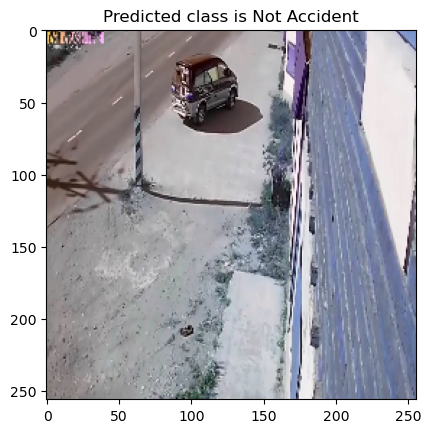

In [58]:
sample = cv2.imread(pics[17], cv2.IMREAD_COLOR)
sample = cv2.resize(sample, (256, 256))
prediction = model.predict(np.expand_dims(sample/255, 0))
accident_probability = prediction[0][1]
threshold = 0.5

if accident_probability >= threshold:
    label = 'Predicted class is Accident'
else:
    label = 'Predicted class is Not Accident'

plt.title(label)
plt.imshow(sample)
plt.show()
